## ITMGT25 EE
### Long Test 2

Lecturer: Joben Ilagan

**First Name:** Yana Riz

**Last Name:** Tan

**Student ID:** 184856

### Part A: Data Validation and Pattern Matching

#### 1) Password Strength Indicator

Write a function **validate_new_password** that accepts a new password and checks for the following in mandatory order, that is, the password will only be evaluated to the next strength level if weaker conditions before it are met.

*Minimum. If not met, password is deemed unacceptable and do not check other conditions*
* must be at least 8 characters **including** special characters (so any character)

*Weak*
* meets minimum password condition and must contain at least one (1) upper case letter

*Medium*
* meets at least the weak password condition and must have at least one (1) numeric character

*Strong*
* meets at least the medium password condition and must have at least one special character among the following: + @ ! * .

The function must return a string with the following possible values:
* 'unacceptable'
* 'minimum'
* 'weak'
* 'medium'
* 'strong'

**(25 Points)**

In [ ]:

    """
    @type: str
    @rtype: str
    
    This one is weak because it does not have at least one numeric character
    >>> validate_new_password("Youshallnotpass")
    'weak'
    
    This one is minimum because it meets the minimum eight characters required
    Regex users: note that \w may not work, so choose another pattern strategy
    >>> validate_new_password("p@ssw0rd")
    'minimum'
    
    >>> validate_new_password("Y0ush@lln0tp@ss")
    'strong'
    
    This one is medium because it has at least one capitalized letter ("Q")
    >>> validate_new_password("Qwerty123")
    'medium'
    
    This one, in spite of having one capitalized letter, one or more special characters,
    and one numeric character, is still unacceptable because it doesn't even meet
    the minimum number of characters
    >>> validate_new_password("X!@1a")
    'unacceptable'
    

    """
    result="unacceptable"
    


In [65]:
import re

def validate_new_password(password):
    if (len(password)<8):
        result = "unacceptable"
    elif (re.match(r"[@\+!\*\.]*.*[0-9]*[A-Z].*[0-9][@\+!\*\.].*[A-Z]*[@\+!\*\.]*",password)):
        result = "strong"
    elif (re.match(r".*[0-9]*[A-Z].*[0-9].*[A-Z]*",password)):
        result = "medium"
    elif (re.match(r".*[A-Z].*",password)):
        result = "weak"
    else: result = "minimum"
    return result

validate_new_password("Youshallnotpass")

'weak'

In [70]:
# Optional: run to see if your code is correct

import doctest

doctest.testmod()

TestResults(failed=0, attempted=0)

In [69]:
# Perform your tests here. Use the docstring test data above for guidance.
validate_new_password("bj8!d@")

'unacceptable'

### Part B: Numeric Computations

From this point onwards, there is no real requirement to define functions with expected return values.

**2) Software Services Company Scenario** 

You own a software company and a client wishes you to quote for work on a mobile app on a fixed price basis. You and your time come up with estimates based on roles and daily rates. You are given the project time and effort estimates and you are able to come up with NumPy arrays below:


In [71]:
import numpy as np

roles       = np.array(["Programmer","Project Manager","Business Analyst","QA Analyst","UX Designer"])
daily_rates = np.array([8500,14000,10000,8500,8500])
man_days    = np.array([20,20,10,10,10])

Note: a **man-day** is a day regarded in terms of the amount of work that can be done by one person within this period (one day in this case). Therefore, in our estimates above, the project will take 20 days of a Programmer's time, 20 days of a Project Manager's time, and so on. **Daily Rates** are the unit price per man day for a given role.

The project cost component for a particular role is computed as follows:

**project cost for role x = (daily rate of role x) * (man days rendered by role x)**

**2a)**

How much will the project cost to the customer be, broken down by role involvement (a.k.a. project cost for role)? Do a quick dump of the breakdown below (no need to use pure NumPy for printing the breakdown for now).

**(5 points)**

In [99]:
proj_cost_role = daily_rates * man_days

#print(len(roles))

print(roles[0]+": "+str(proj_cost_role[0]))
print(roles[1]+": "+str(proj_cost_role[1]))
print(roles[2]+": "+str(proj_cost_role[2]))
print(roles[3]+": "+str(proj_cost_role[3]))
print(roles[4]+": "+str(proj_cost_role[4]))

print("Total: P", proj_cost_role.sum())

Programmer: 170000
Project Manager: 280000
Business Analyst: 100000
QA Analyst: 85000
UX Designer: 85000
Total: P 720000


**2b)**

To mitigate risks involving fixed-price projects, it's usually industry practice to pad around 20-30% on top of the base quote. Let's pad 30% to be on the safe side because the customer hasn't been very clear on what the real needs of the mobile app are.

To be clear: "padding" means applying a certain percentage on top of the base. In our case, it's multiplying 1.30 to the base cost.

How much would you quote the customer? Use NumPy operations to derive this.

**(5 points)**

In [100]:
proj_cost_role = daily_rates * man_days

padding = 1.30*proj_cost_role

print("Total including padding: P",padding.sum())

Total including padding: P 936000.0


The customer agrees to your quote and is happy with the price. However, the person designated by the customer to provide the details required by your UX designers took long. Also, when the details were given, the programmers were not clear on what was actually needed. When the customer finally inspected the work, there were lots of revisions done. The Project Manager also had to stay longer because of the delays. QA too had to do another round of testing.

The actual days rendered by each role are shown below:

In [102]:
actual_man_days    = np.array([30,25,10,20,20])

**2c)**

These extra man days could have been used to earn extra for the company in other more profitable projects.

To compute this opportunity loss, we simply multiply the days lost by the daily rates per role.

What is the opportunity loss per role?

**(3 points)**

In [108]:
opp_loss_role = daily_rates * (actual_man_days-man_days)

print(roles[0]+": "+str(opp_loss_role[0]))
print(roles[1]+": "+str(opp_loss_role[1]))
print(roles[2]+": "+str(opp_loss_role[2]))
print(roles[3]+": "+str(opp_loss_role[3]))
print(roles[4]+": "+str(opp_loss_role[4]))

Programmer: 85000
Project Manager: 70000
Business Analyst: 0
QA Analyst: 85000
UX Designer: 85000


**2d)**

What is the total opportunity loss (a.k.a. "project leak")?

**(2 points)**

In [109]:
print("Project Leak: P",opp_loss_role.sum())




Project Leak: P 325000


### Part C: Data Extraction, Loading and Transformation

Consider this dataset from the Philippine Statisics Authority [website](http://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2G/0032G4CBPC0.px/?rxid=bdf9d8da-96f1-4100-ae09-18cb3eaeb313).

The file has already been downloaded for you and saved as **dataset.csv**.

* Number - refer to the total number of units constructed
* Floor area - refer to the sum of the area of construction
* Type - refer to the use of the construction
* Value - refer to the total estimated value of construction

#### 3) Extraction of new data

**3a)**

Load the file **dataset.csv** into a Pandas DataFrame

**(15 Points)**


In [170]:
import pandas as pd

dataset_df = pd.read_csv("dataset.csv")

**3b)**

Inspect the header of the new dataframe

**(5 points)**

In [171]:
dataset_df.head()

Construction Statistics from Approved Building Permits
Year Period Geolocation                              Total Number Total Floor area Total Value Residential Number Residential Floor area Residential Value Non-residential Number Non-residential Floor area Non-residential Value Additions Number Additions Floor area Additions Value Alterations/Repairs/Renovations Number Alterations/Repairs/Renovations Floor area Alterations/Repairs/Renovations Value Demolitions Number Demolitions Floor area Demolitions Value Street furnitures... Number Street furnitures... Floor area                         Street furnitures... Value    
2017 Annual PHILIPPINES                              152012       31884027         333214520   110942             16301228               164153250         21349                  15035707                   143315470             5086             547092               4301000         14635                                  ..                                         21444800                              399                ..                     93549             1346                        ..                                                                         1855228    
            ..National Capital Region (NCR)          12612        6636192          101147791   6477               3858427                53003187          1415                   2678456                    35241138              381              99309                859346          4339                                   ..                                         12044119                              284                ..                     5906              136                         ..                                                                          582239    
            ..Cordillera Administrative Region (CAR) 1303         383183           4692144     952                246940                 2697933           219                    121080                     1571763               40               15163                193085          92                                     ..                                         229363                                0                  ..                     0                 5                           ..                                                                            8766    
            ..Region I (Ilocos Region)               10610        1402633          12913225    7614               808002                 7177823           1461                   559370                     4832591               467              35261                289560          1068                                   ..                                         613252                                15                 ..                     732               152                         ..                                                                           80525

**3c)**

You'll note that there is an extra line on top (as you scroll to the right).

Reload the data again, this time skipping the first row. Re-inspect the header to see if the extra line is now gone.

**(5 points)**

In [172]:
df = pd.read_csv("dataset.csv",skiprows=1,engine='python')

df

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,..,21444800,399,..,93549,1346,..,1855228
1,2017,Annual,..National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,..,12044119,284,..,5906,136,..,582239
2,2017,Annual,..Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,..,229363,0,..,0,5,..,8766
3,2017,Annual,..Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,..,613252,15,..,732,152,..,80525
4,2017,Annual,..Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,..,260136,4,..,599,24,..,26707
5,2017,Annual,..Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,..,1272162,22,..,1164,123,..,101878
6,2017,Annual,..Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,..,1773690,11,..,9472,149,..,230907
7,2017,Annual,..MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,..,167215,0,..,0,16,..,57225
8,2017,Annual,..Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,..,181796,14,..,2029,11,..,3089
9,2017,Annual,..Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,..,729920,6,..,24,161,..,140552


**3d)**

Inspect the tail of the dataframe to see if any extraneous lines were read in. Were there any? If so, discard. Otherwise, leave as-is.

**(5 points)**

In [173]:
#with open("dataset.csv","r") as file:
    #lines = [line for line in file.readlines()]

#print("".join(lines[-10:-1]))


df.tail()


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
1135,2006,Quarter 4,..Region XI (Davao Region),2498,291774,1691128,1814,174256,879276,270,...,44526,282,..,86877,..,..,..,14,..,461
1136,2006,Quarter 4,..Region XII (SOCCSKSARGEN),439,62837,364387,239,19734,104307,139,...,8604,39,..,15596,..,..,..,10,..,2004
1137,2006,Quarter 4,..Region XIII (Caraga),689,50382,270726,397,28618,144109,56,...,3043,229,..,11331,..,..,..,..,..,..
1138,2006,Quarter 4,..Autonomous Region in Muslim Mindanao (ARMM),..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1139,2006,Quarter 4,..Negros Island Region,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


**3e)**

Display the columns of the new dataframe. Write the command below to dump information about the columns on the output area below the cell.

**(5 points)**

In [174]:
df.columns

Index(['Year', 'Period', 'Geolocation', 'Total Number', 'Total Floor area',
       'Total Value', 'Residential Number', 'Residential Floor area',
       'Residential Value', 'Non-residential Number',
       'Non-residential Floor area', 'Non-residential Value',
       'Additions Number', 'Additions Floor area', 'Additions Value',
       'Alterations/Repairs/Renovations Number',
       'Alterations/Repairs/Renovations Floor area',
       'Alterations/Repairs/Renovations Value', 'Demolitions Number',
       'Demolitions Floor area', 'Demolitions Value',
       'Street furnitures... Number', 'Street furnitures... Floor area',
       'Street furnitures... Value'],
      dtype='object')

**3f)**

In one or two paragraphs, what other observations of the data can you make?

* How many columns are there?
* How do you describe the overall structure of the data?
* Is it easy to perform analysis on? 
* How do you envision cleaning and transforming the data further?
* Are they mostly numeric?
* Are there any missing values?

**(10 points)**

*Write your answers in this cell in Markdown format.* (double-click to edit)

-----

The table given provides the data of the Construction Statistics from Approved Building Permits. There are 24 columns in total. The data is not easily understandable due to the structure of the data. For instance, the column "Total Number" is the summation of units constructed, in which case, it only includes the "Residential number", "Non-Residential Number", "Additions Number" and "Alterations/Repairs/Renovations Number". The "Demolitions Number" and "Street furnitures... Number" is not included in the Total, but the fact that it is written beside the other columns makes people assume that it is included. The same applies for the "Total Floor Area" and the "Total Value". Furthermore, since the table claims to provide statistics, the nature of the data is mostly numeric. However, there are a lot of missing values (full columns and rows that contain ".." instead of 0s). It is also important to note that the column headers also contain excess dots. In order to clean and transform the data, the empty rows and columns should be dropped and removed from the data set. Additionally, the header should be uniformed in such a way that it no longer contains excess dots. 








#### 4) Produce Clean Data

**4a)**

The numeric figures have ".."s mixed within. 

Replace these with zeros (0s) for the whole dataframe.

**Be careful!** The data in Geolocation also has trailing ".."s so make sure you don't accidentally replace these with zeros as well.

**(25 Points)**


In [176]:
import re

df.loc[:,"Total Number":"Street furnitures... Value"]=df.loc[:,"Total Number":"Street furnitures... Value"].replace(r"\.\.$","0",regex=True)

df.fillna(0, inplace=True)

df

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,0,21444800,399,0,93549,1346,0,1855228
1,2017,Annual,..National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,0,12044119,284,0,5906,136,0,582239
2,2017,Annual,..Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,0,229363,0,0,0,5,0,8766
3,2017,Annual,..Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,0,613252,15,0,732,152,0,80525
4,2017,Annual,..Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,0,260136,4,0,599,24,0,26707
5,2017,Annual,..Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,0,1272162,22,0,1164,123,0,101878
6,2017,Annual,..Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,0,1773690,11,0,9472,149,0,230907
7,2017,Annual,..MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,0,167215,0,0,0,16,0,57225
8,2017,Annual,..Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,0,181796,14,0,2029,11,0,3089
9,2017,Annual,..Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,0,729920,6,0,24,161,0,140552


**4b)**

Now take out the leading '..' in the "Geolocation" column. Make sure that the changes are permanent.

*Tip: when in doubt, practice with one line of string.*

**(10 points)**

In [178]:
df.loc[:,"Geolocation"]=df.loc[:,"Geolocation"].replace(r"^\.\.","",regex=True)

df


,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Additions Value,Alterations/Repairs/Renovations Number,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,4301000,14635,0,21444800,399,0,93549,1346,0,1855228
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,859346,4339,0,12044119,284,0,5906,136,0,582239
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,193085,92,0,229363,0,0,0,5,0,8766
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,289560,1068,0,613252,15,0,732,152,0,80525
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,23195,230,0,260136,4,0,599,24,0,26707
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,563558,1431,0,1272162,22,0,1164,123,0,101878
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,1129117,2318,0,1773690,11,0,9472,149,0,230907
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,28561,117,0,167215,0,0,0,16,0,57225
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,57884,268,0,181796,14,0,2029,11,0,3089
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,107675,771,0,729920,6,0,24,161,0,140552


**4c)**

What are the datatypes of each column? Write a command which will dump the types in the results after the cell.

**(5 points)**

In [180]:
df.dtypes



Year                                           int64
Period                                        object
Geolocation                                   object
Total Number                                  object
Total Floor area                              object
Total Value                                   object
Residential Number                            object
Residential Floor area                        object
Residential Value                             object
Non-residential Number                        object
Non-residential Floor area                    object
Non-residential Value                         object
Additions Number                              object
Additions Floor area                          object
Additions Value                               object
Alterations/Repairs/Renovations Number        object
Alterations/Repairs/Renovations Floor area    object
Alterations/Repairs/Renovations Value         object
Demolitions Number                            

**4d)**

We cannot work with supposedly-numeric values that are actually strings.

Convert columns from **'Total Value'** to **'Street furnitures... Value'** to numeric.

Verify that the changes have been permanent.

**(5 points)**

In [181]:
df.loc[:,"Total Number":"Street furnitures... Value"]=df.loc[:,"Total Number":"Street furnitures... Value"].apply(pd.to_numeric)


In [182]:
df.dtypes


Year                                           int64
Period                                        object
Geolocation                                   object
Total Number                                   int64
Total Floor area                               int64
Total Value                                    int64
Residential Number                             int64
Residential Floor area                         int64
Residential Value                              int64
Non-residential Number                         int64
Non-residential Floor area                     int64
Non-residential Value                          int64
Additions Number                               int64
Additions Floor area                           int64
Additions Value                                int64
Alterations/Repairs/Renovations Number         int64
Alterations/Repairs/Renovations Floor area     int64
Alterations/Repairs/Renovations Value          int64
Demolitions Number                            

### Part D: Exploratory Data Analysis and Data Visualization



#### 5) Preliminary Data Analysis

Now that our dataset is in a state that is ready for Exploratory Data Analysis, we can now dig deeper into questions.



In [ ]:
# (optional) inspect the dataframe again here
# ---------------------------------





**5a)**

We'd like to know the Residential and Non-residential Values per Floor Area. Note that we don't know whether floor area is in square meters or square feet. Let it not matter for now.

Create two new columns:
* Residential Value Per Floor Area = "Residential Value" / "Residential Floor area"
* Non-residential Value Per Floor Area = "Non-residential Value" / "Non-residential Floor area"

Inspect the new columns.

**(15 points)**

In [186]:
df["Residential Value Per Floor Area"] = df.loc[:,"Residential Value"]/ df.loc[:,"Residential Floor area"]

df["Non-residential Value Per Floor Area"] = df.loc[:,"Non-residential Value"]/ df.loc[:,"Non-residential Floor area"]



In [190]:
df

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,0,21444800,399,0,93549,1346,0,1855228,10.069993,9.531675
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,0,12044119,284,0,5906,136,0,582239,13.736994,13.157259
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,0,229363,0,0,0,5,0,8766,10.925460,12.981194
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,0,613252,15,0,732,152,0,80525,8.883422,8.639346
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,0,260136,4,0,599,24,0,26707,8.923065,8.645037
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,0,1272162,22,0,1164,123,0,101878,8.790752,6.376936
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,0,1773690,11,0,9472,149,0,230907,8.743916,9.667253
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,0,167215,0,0,0,16,0,57225,8.423894,10.931210
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,0,181796,14,0,2029,11,0,3089,9.422701,10.438817
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,0,729920,6,0,24,161,0,140552,9.869196,9.438746


**5b)**

Oops, there seems to have been NaNs introduced with the addition of the new columns. Perhaps brought about by divided-by-zero operations. 

What are rows with NaNs? Write code that displays these rows in the output area of the cell.

*Hint: use DataFrame.any(axis=1)*

**(10 points)**

In [191]:
df.isna().any(axis=1)


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
1115    False
1116    False
1117    False
1118    False
1119    False
1120     True
1121    False
1122    False
1123    False
1124    False
1125    False
1126    False
1127    False
1128    False
1129    False
1130    False
1131    False
1132    False
1133    False
1134    False
1135    False
1136    False
1137    False
1138     True
1139     True
Length: 1140, dtype: bool

**5c)**

Replace the NaNs with zeros (0s). Verify that no more rows with NaNs exist after. Show that there are zero (0) rows that have NaNs.

**(10 points)**

In [195]:
df.fillna(0, inplace=True)

df.loc[df.isna().any(axis=1),:]

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area


#### 6) Data Visualization

**6a)**

Warm-up Matplotlib activities.

Prepare a scatterplot of Total Value per year (which means we need the Annual, not Quarter figures) for the whole of the PHILIPPINES.

**(10 points)**

In [196]:
df

,Year,Period,Geolocation,Total Number,Total Floor area,Total Value,Residential Number,Residential Floor area,Residential Value,Non-residential Number,...,Alterations/Repairs/Renovations Floor area,Alterations/Repairs/Renovations Value,Demolitions Number,Demolitions Floor area,Demolitions Value,Street furnitures... Number,Street furnitures... Floor area,Street furnitures... Value,Residential Value Per Floor Area,Non-residential Value Per Floor Area
0,2017,Annual,PHILIPPINES,152012,31884027,333214520,110942,16301228,164153250,21349,...,0,21444800,399,0,93549,1346,0,1855228,10.069993,9.531675
1,2017,Annual,National Capital Region (NCR),12612,6636192,101147791,6477,3858427,53003187,1415,...,0,12044119,284,0,5906,136,0,582239,13.736994,13.157259
2,2017,Annual,Cordillera Administrative Region (CAR),1303,383183,4692144,952,246940,2697933,219,...,0,229363,0,0,0,5,0,8766,10.925460,12.981194
3,2017,Annual,Region I (Ilocos Region),10610,1402633,12913225,7614,808002,7177823,1461,...,0,613252,15,0,732,152,0,80525,8.883422,8.639346
4,2017,Annual,Region II (Cagayan Valley),4581,707831,6459199,3550,298692,2665248,774,...,0,260136,4,0,599,24,0,26707,8.923065,8.645037
5,2017,Annual,Region III (Central Luzon),16340,4369511,33433864,11386,1792612,15758408,3086,...,0,1272162,22,0,1164,123,0,101878,8.790752,6.376936
6,2017,Annual,Region IV-A (CALABARZON),37612,6591949,61631254,29260,3967770,34693849,3152,...,0,1773690,11,0,9472,149,0,230907,8.743916,9.667253
7,2017,Annual,MIMAROPA Region,2432,434325,4453365,1569,172470,1452869,721,...,0,167215,0,0,0,16,0,57225,8.423894,10.931210
8,2017,Annual,Region V (Bicol Region),3179,528550,5442205,2168,235282,2216992,675,...,0,181796,14,0,2029,11,0,3089,9.422701,10.438817
9,2017,Annual,Region VI (Western Visayas),11545,2116442,21174959,8935,1084038,10698583,1648,...,0,729920,6,0,24,161,0,140552,9.869196,9.438746


Text(0.5, 0, 'Year')

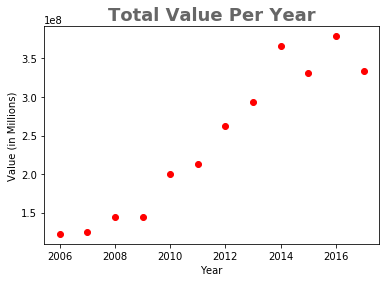

In [242]:
import matplotlib.pyplot as plt


x = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ]
y = [122211347, 124909731, 143762740, 143529498, 200297164, 212975571, 261828308, 293136032, 366551523, 331592415, 378895886, 333214520]

fig, ax = plt.subplots(1)

ax.scatter(x,y,color="Red")


title_font = {'fontname':'Lato','fontsize':18,'fontweight':'bold',"color":"#666666"}
tick_font = {'fontname':'Lato','fontsize':10,"color":"Black"}

ax.set_title("Total Value Per Year", **title_font)
ax.set_ylabel("Value (in Millions)")
ax.set_xlabel("Year")


**6b)**

Create a quick and dirty bar plot showing both Residential Value and Non-Residential Value throughout the years for the whole of the PHILIPPINES stacked together in one bar per year (a.k.a. "stacked bar"). No need to format the numbers, but go ahead if you want to.

*Hint:* draw two sets of bars, the second one with a **bottom** parameter pointing to the height of the first one.


**(15 points)**

Text(0.5, 0, 'Year')

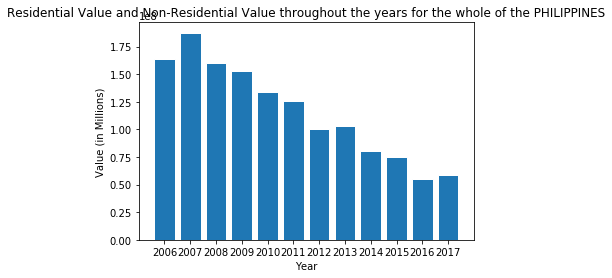

In [260]:
import matplotlib.pyplot as plt

resi = [164153250, 187599731, 160065906, 152755734, 133783612, 125864536,100220969, 102943619, 80108885, 74892765, 55401708,58454457]
non_resi = [21349, 17845, 16126,15191, 14622, 15952, 14881, 13237, 13280, 11850, 11461,15580]

name = ["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"] 

fig, ax = plt.subplots(1)

ax.bar(height=resi,x=name, edgecolor="white")
ax.bar(height=non_resi,x=name,bottom=resi,edgecolor="white")
ax.set_title("Residential Value and Non-Residential Value throughout the years for the whole of the PHILIPPINES")
ax.set_ylabel("Value (in Millions)")
ax.set_xlabel("Year")

**6c)**

Create quick and dirty bar plot showing Total Value for 2017 across Regions, sorted by Total Value in descending order. No need to format the numbers, but you can if you'd like.

Note that all rows except those with PHILIPPINES are for regions, so simply omit the rows with PHILIPPINES.

Also note that Year is now numeric.

**(10 points)**

In [236]:
data= df.loc[1:18,["Year","Geolocation","Total Value"]]

final_data = data.sort_values(by=['Total Value'], ascending=False)

final_data

,Year,Geolocation,Total Value
1,2017,National Capital Region (NCR),101147791
6,2017,Region IV-A (CALABARZON),61631254
5,2017,Region III (Central Luzon),33433864
10,2017,Region VII (Central Visayas),31738186
9,2017,Region VI (Western Visayas),21174959
14,2017,Region XI (Davao Region),19498862
3,2017,Region I (Ilocos Region),12913225
11,2017,Region VIII (Eastern Visayas),8947746
13,2017,Region X (Northern Mindanao),8580818
15,2017,Region XII (SOCCSKSARGEN),6514975


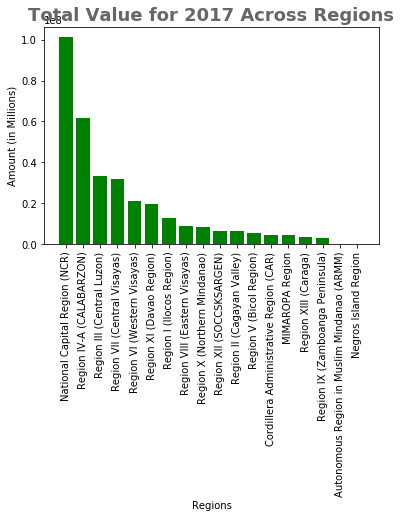

In [241]:
fig,ax = plt.subplots(1)

title_font = {'fontname':'Lato','fontsize':18,'fontweight':'bold',"color":"#666666"}
tick_font = {'fontname':'Lato','fontsize':10,"color":"Black"}

ax.bar(height=final_data.loc[:,"Total Value"],x=final_data.loc[:,"Geolocation"], color="Green")
ax.set_title("Total Value for 2017 Across Regions", **title_font)
ax.set_ylabel("Amount (in Millions)")
ax.set_xlabel("Regions")
#ax.set_xticklabels(mm_df.loc[:,"Geographic Location"],**tick_font)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

